In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [29]:
# loading the dataset from scikit-learn
# Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

data = datasets.load_breast_cancer()
df_cancer = pd.DataFrame(data = np.c_[data['data'], data['target']],columns = list(data['feature_names']) + ['target'])
train_df_cancer, test_df_cancer = train_test_split(df_cancer, random_state = 1)
tree_model = DecisionTreeClassifier(random_state = 1)
tree_model.fit(train_df_cancer.drop('target',axis = 1), train_df_cancer.target)

DecisionTreeClassifier(random_state=1)

In [30]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [31]:
# Display the dataframe info()

df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
# Display the missing values

df_cancer.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## Hypothesis 1: Most of the features values are near to 0.

Proof of the hypothesis 1: Most of the values lie between 0.2 to 0.35 as shown in histogram, therefore, null hypothesis is true.

(array([ 23., 153., 219., 114.,  35.,  11.,   9.,   3.,   1.,   1.]),
 array([0.1565 , 0.20723, 0.25796, 0.30869, 0.35942, 0.41015, 0.46088,
        0.51161, 0.56234, 0.61307, 0.6638 ]),
 <a list of 10 Patch objects>)

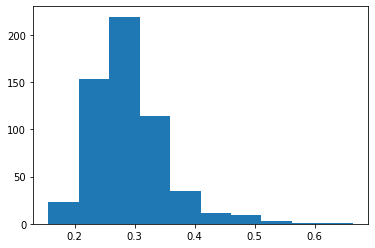

In [7]:
plt.hist(df_cancer['worst symmetry'])

## Hypothesis 2: Both the classes depend on the features values and feature values are different for for each class.

In [8]:
features = df_cancer.drop('target', axis=1, inplace=False)

In [9]:
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
target_vals = df_cancer.target

Proof of hypothesis 2: Worst Symmetry feature has a different impact on both classes, in one class maximum values lie at .3 and for the other it lies slighter over .25. Similarly for other feature 'worst concavity'.

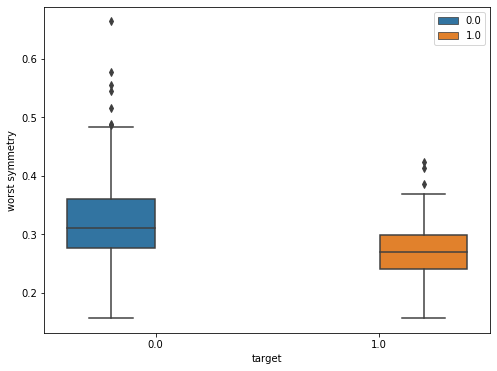

In [38]:
plt.figure(figsize=(8,6))
#sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x='target', y='worst symmetry', hue="target", data=df_cancer)
plt.legend(loc='best')

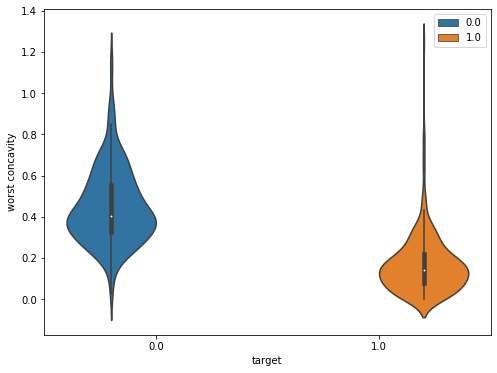

In [39]:
plt.figure(figsize=(8,6))
#sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x='target', y='worst concavity', hue="target", data=df_cancer)
plt.legend(loc='best')

I will be using Classification algorithm of supervised learning, since the dataset has outcome variable or dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign)

Now predicting the test/train set results and check the accuracy with each of the model:

In [14]:
x_predict = tree_model.predict(train_df_cancer.drop('target', axis = 1))

In [15]:
from sklearn.metrics import accuracy_score
train_score = accuracy_score(train_df_cancer['target'], x_predict) 

### accuracy of the train set -

In [16]:
train_score

1.0

In [17]:
y_train = test_df_cancer.drop('target', axis = 1)

In [18]:
y_test = test_df_cancer['target']

In [19]:
y_predict = tree_model.predict(test_df_cancer.drop('target', axis = 1))

In [20]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(test_df_cancer['target'], y_predict) 

### accuracy of the test set -

In [21]:
test_score

0.9300699300699301

precision accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

### precision of the test set -

In [22]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict, average = 'macro')  

0.9424867021276595

recall accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

### recall of the test set -

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict, average = 'macro')  

0.9125

### f1 score of the test set -

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9456521739130435

### area over the curve of the test set -

In [25]:
from sklearn.metrics import roc_curve, auc
scores = tree_model.predict_proba(y_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

In [26]:
print('Area over the curve = ',auc(fpr, tpr))

Area over the curve =  0.9125000000000001
